# Importing Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy
from warnings import filterwarnings
filterwarnings('ignore')

# Table of content:

<ul>
<li><a href="#content">Data content </a></li>
<li><a href="#c">Data cleaning </a></li>
<li><a href="#corr">Correlation Analysis </a></li>

<li><a href="#mb">Model Building</a></li>
<li><a href="#sup">Supervised Learning </a></li>
<li><a href="#un">unsupervised Learning </a></li>  


    

</ul>

# Load Dataset:

In [3]:
data = pd.read_csv('diabetes.csv')
data=pd.DataFrame(data)


<a id='content'></a>
# Explatory Data Analysis:

In [4]:
#view first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# columns information

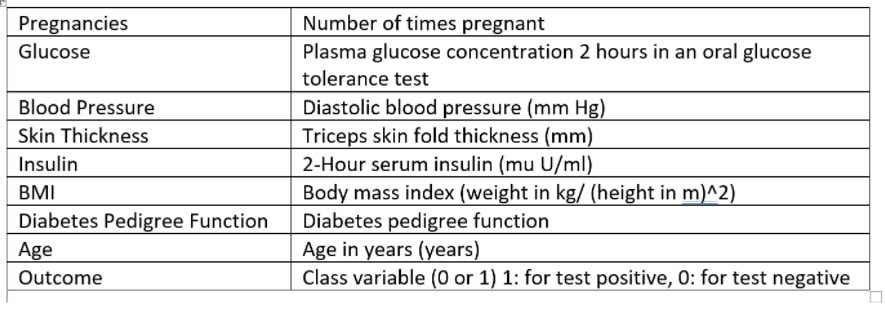

In [4]:
#view columns name
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#view dimentions of dataset
data.shape

(768, 9)

In [6]:
#View statistical properties of dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Checking For datatypes of the attributes and counts non_null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


> **All Data is numeric which is easier to deal with** 

<a id="#c"></a>
<a id='c'></a>

## Data Cleaning :

In [8]:
#check for missing value
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

> **There is no Null values in dataset**

In [9]:
data.duplicated().sum()

0

> **There is no duplicates in dataset**

In [5]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())


> **we replaces zeros in the previous columns as they are meaningless so , we replace it with thair average values**

In [11]:
#display some statistical information about our data  
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> **conclusion : Data is clean and ready for Analysis** 

In [12]:
# show unique values of our label 
data['Outcome'].unique()

array([1, 0], dtype=int64)

**Note**

   - 1 indicates positive diabetes
   - 0 inducates Negative diabetes

# Data Visualization

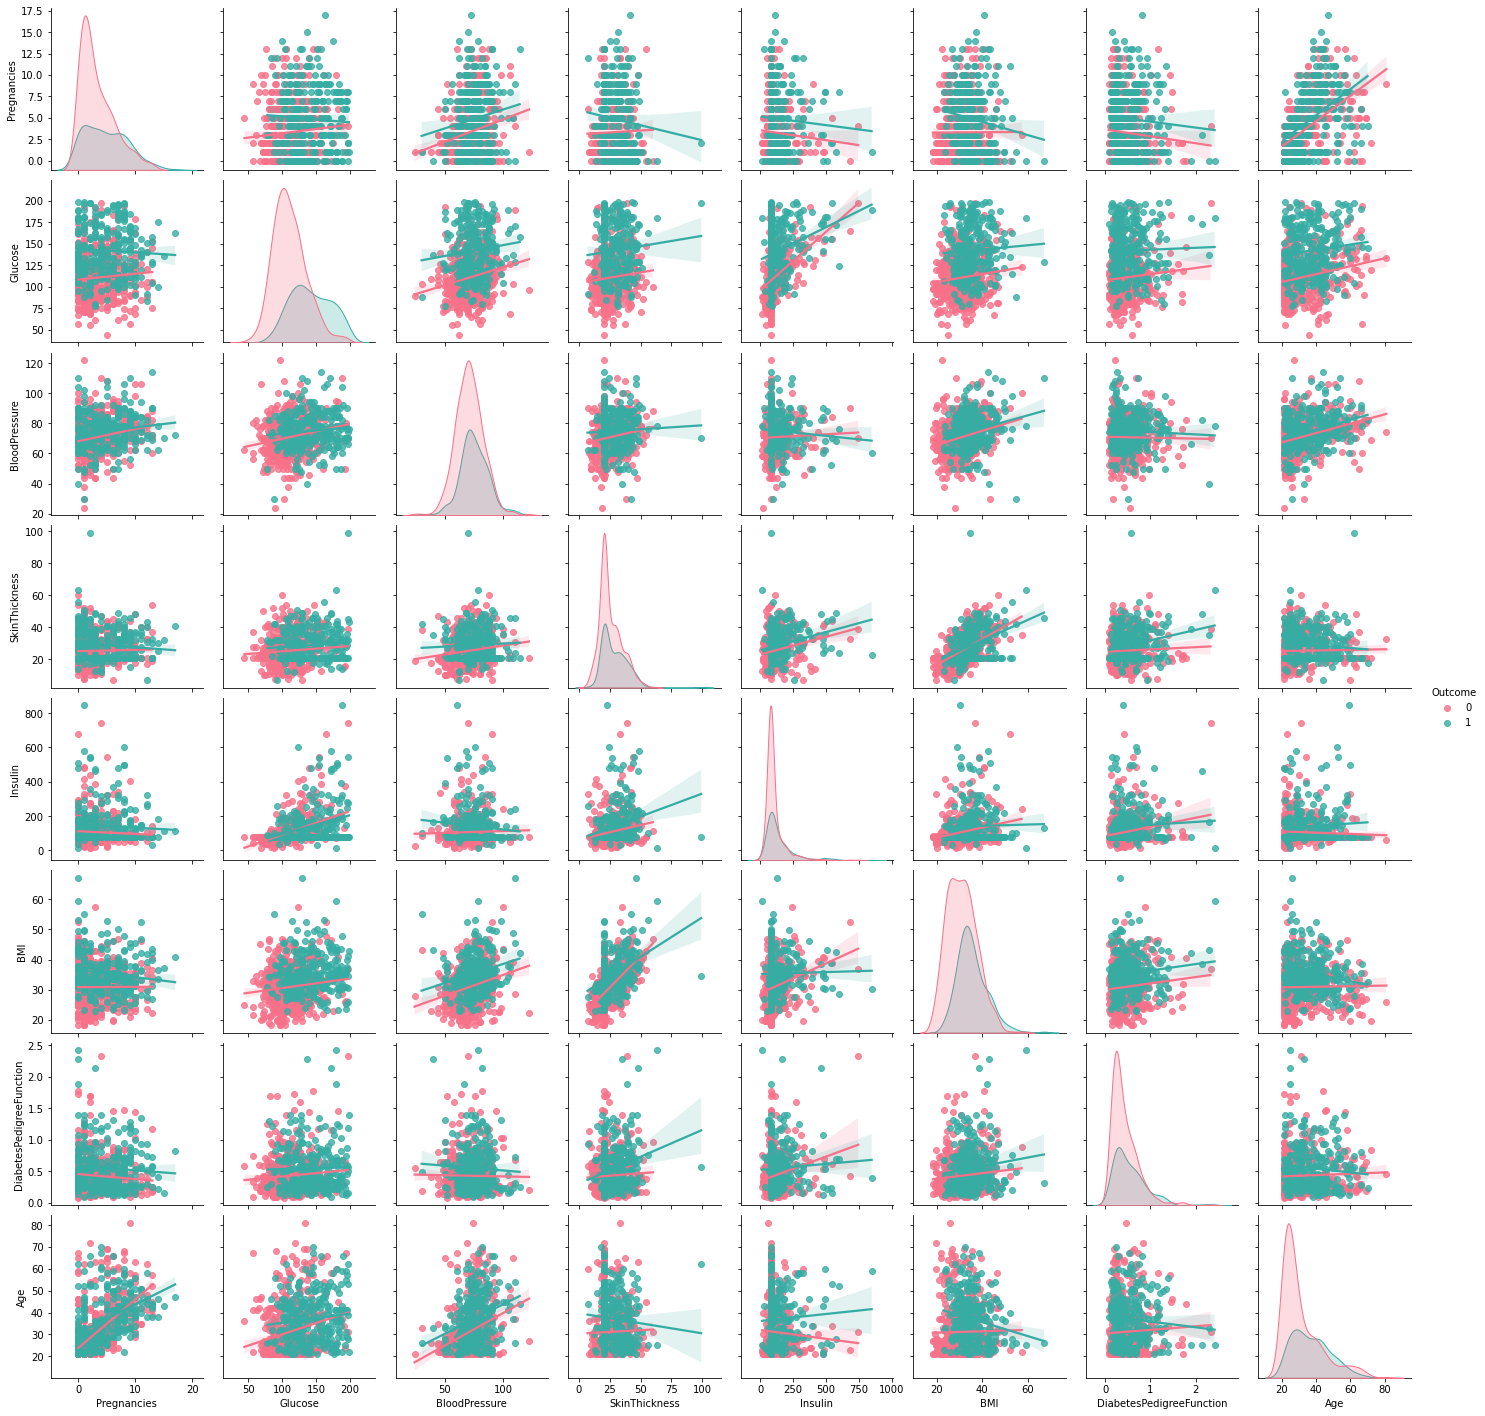

In [13]:
sns.pairplot(data, hue="Outcome",kind='reg',palette='husl')

In [14]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

> **negative test results is more than positive ones** 

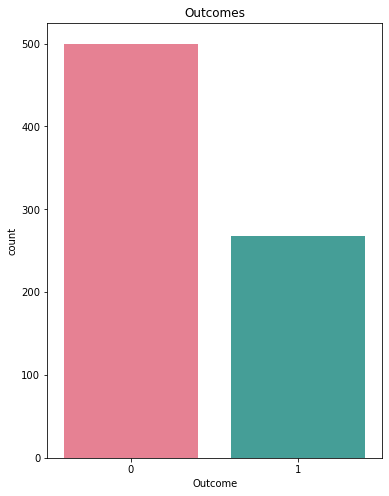

In [15]:
plt.ax =plt.subplots(figsize=(6,8))
ax=sns.countplot(x='Outcome',data=data,palette='husl')
plt.title('Outcomes');

> **conclusion :
 Negative test are more than positive ones**

<a id='corr'></a>

## Correlation Analysis :
**Correlation analysis is used to quantify the degree to which two variables are related. Through the correlation analysis, you evaluate correlation coefficient that tells you how much one variable changes when the other one does. Correlation analysis provides you with a linear relationship between two variables.**

In [6]:
correlation = data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


>This matrix display correlation between each atrribute with other attributes

**Correlation coefficients are indicators of the strength of the linear relationship between two different variables, x and y. A linear correlation coefficient that is greater than zero indicates a positive relationship. A value that is less than zero signifies a negative relationship. Finally, a value of zero indicates no relationship between the two variables x and y.**


**correlation co-effcient range is ( -1 < r < 1 )where:**
   - will be (1) if the two features are totally simillar directly  such as the diagonal in the matrix all are ones becaues it display correlation between feature and itself which will be totally similar 
   - will be (-1) if they are totally similar but inversely 
   - will be (0 < r < 1) if they are direclty similar but not totally they will be similar with certain ratio (e.g:r=0.8)
   - will be (-1 < r < 0) if they are inversely similar but not totally they will be similar with certain ratio (e.g:r=-0.8)
   - will  be 0 if there is no correlation
 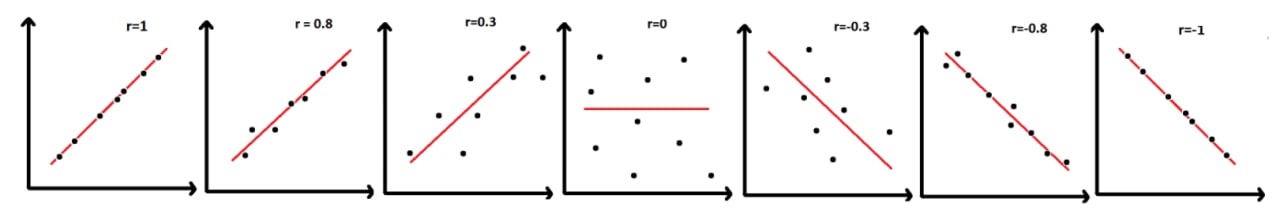
**these ratios displayed here by the colour contrast , highly contrast colour refers to positive corelation co-eefcient , lower contrast  colour refers to negative corelation co-eefcient**


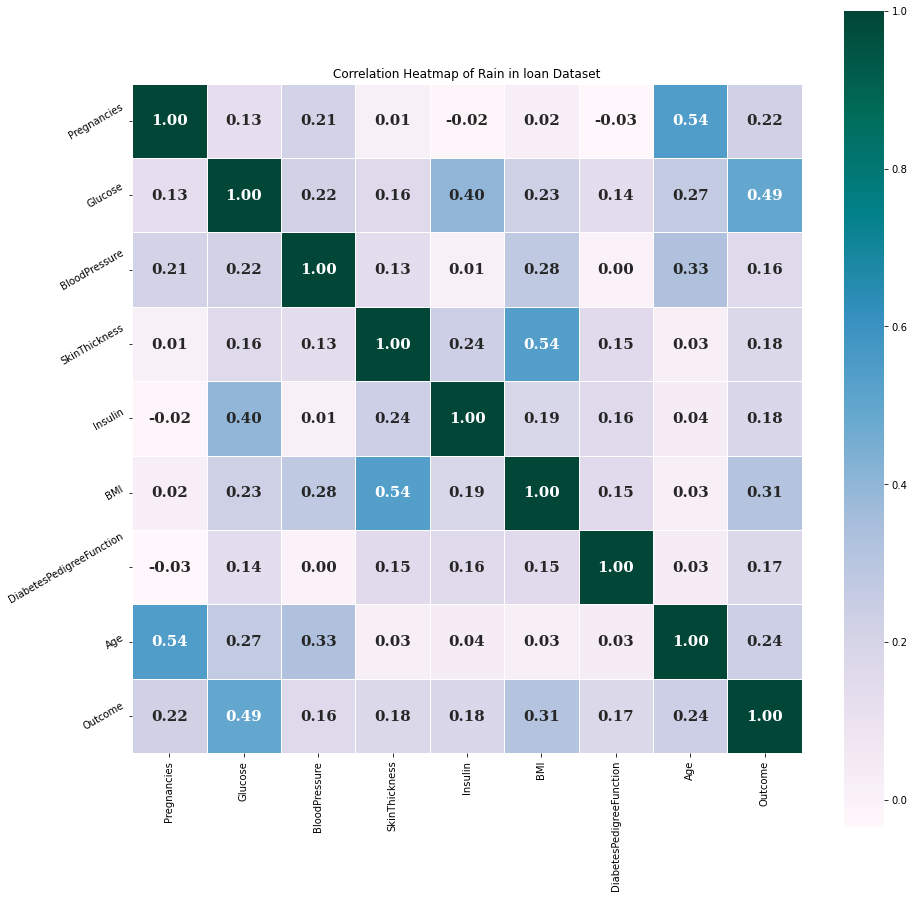

In [17]:
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Rain in loan Dataset')
ax = sns.heatmap(correlation, cmap='PuBuGn',annot=True,annot_kws={'fontsize':15,'fontweight':'bold','fontfamily':'serif'},fmt=".2f",linewidth=1,square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

### Conclusion :
**From correlation Heatmap , the high correlation between the outcome and those features [Pregnancies,Glucose,Age,Insulin,BMI] so, we can select those features to accept input from user and predict outcome**

<a id='mb'></a>

# Model Building

Now, we will build classification models for diabetes dataset Using supervised Models as our data is binary labelled.

**Supervised Models:**

📌 **K-Nearest Neighbors**: Uses the concept of nearest neighbors

📌 **naive bayes**:based on the Bayes Theorem, used in a wide variety of classification tasks.
 
📌 **Descision Tree**:by learning simple decision rules inferred from the data features

📌 **Logestic Regression**: used for solving the classification problems.

**Unsupervised Model:**

📌 **KMeans Clustering**: tries to cluster data based on their similarity or dissimailarity
    but here we will apply on iris dataset instead of diabetes dataset which is better in performance.



<a id='sup'></a>
# Supervised :
>**target :predicticting  test result whether a patient has diabetes (positive or negative ) test based on diagnostic measurements we store about this patient**

#             K Nearest Neighbours(KNN):
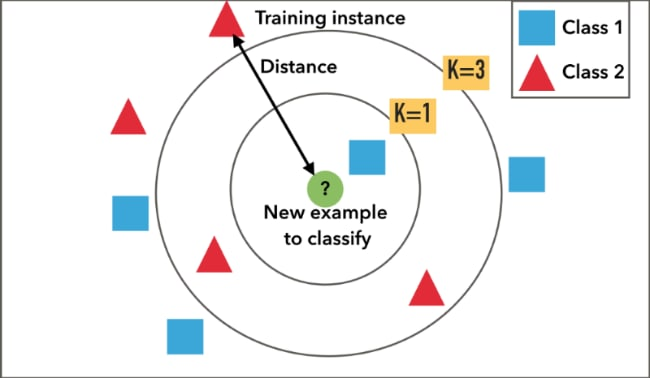

In [7]:
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1) #store all features except label 
Y = data['Outcome'] #store label data 

## Firslty ,Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
#creating an object scaler to use standardScaler
scaler = StandardScaler()

In [56]:
scaler.fit(X)

StandardScaler()

In [57]:
#fitting the fitted data and transformed train and test data form standard scaler
scaled_features = scaler.transform(X)

In [58]:
standraized_data = pd.DataFrame(scaled_features,columns=data.columns[:-1])
standraized_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


# Train Test Split:

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#by default train test split splits data into 75% training data and 25 test data
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Outcome'],
                                                    test_size=0.30,random_state=21,stratify=Y)


> **Data is spliited 30% for test 70% for Trainning** 

In [61]:
len(X_train) 

537

In [62]:
len(X_test)

231

In [63]:
#split the data into train and test set
train,test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

# KNN:

## Choosing a K Value

Let's go ahead and use the cross_validation to pick a good K Value:

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
#by cross validation method
from sklearn.model_selection import cross_val_score
Scores1 = []

for i in range(1,50): # (i) will represent k value for each iteration 
    
    knn2 = KNeighborsClassifier(n_neighbors=i)
    scores2=cross_val_score(knn2,scaled_features,Y,cv=10) # get 10 accuarcy values depend on k value in each iteration
    Scores1.append(scores2.mean()) # get mean of 10 values store in score2 each iteration 

In [66]:
print(scores2)

[0.75324675 0.74025974 0.76623377 0.67532468 0.72727273 0.77922078
 0.76623377 0.80519481 0.68421053 0.84210526]


In [67]:
print(Scores1)

[0.6861927546138072, 0.7017942583732057, 0.7448222829801778, 0.7342617908407383, 0.7382946001367056, 0.7420881749829118, 0.7500170881749828, 0.7486671223513329, 0.755228981544771, 0.7487012987012986, 0.7565447710184553, 0.7473342447026659, 0.7629528366370472, 0.7551777170198223, 0.7577922077922079, 0.7499145591250855, 0.7578092959671906, 0.7552118933697882, 0.7578092959671907, 0.7565276828434724, 0.7656185919343815, 0.7604408749145591, 0.76825017088175, 0.7617737525632263, 0.7656527682843473, 0.7643028024606973, 0.7734278879015722, 0.772112098427888, 0.7760765550239235, 0.7682330827067669, 0.7734278879015721, 0.7682159945317839, 0.7773752563226248, 0.7682501708817497, 0.7656527682843473, 0.7617395762132605, 0.7669514695830484, 0.7630553656869447, 0.7670027341079974, 0.7643540669856461, 0.7696001367053998, 0.7630724538619276, 0.7682672590567328, 0.7617908407382092, 0.7591763499658237, 0.7565447710184553, 0.7565447710184553, 0.7565618591934381, 0.7539302802460697]


### plot Scores vs K value 

Text(0, 0.5, 'Accuracy')

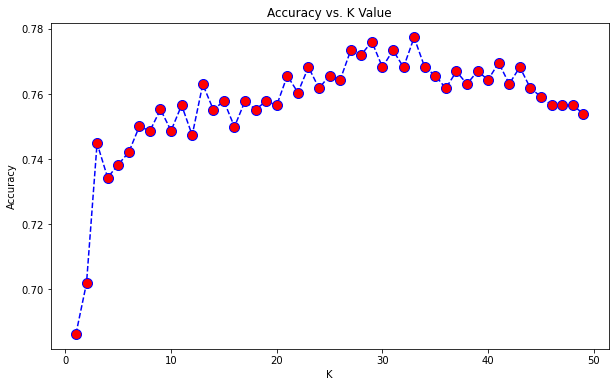

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),Scores1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

## Using KNN Classifier :


In [69]:
knn = KNeighborsClassifier(n_neighbors=35,weights='distance') #n_neighbors=35 represent k=25 

In [70]:
# trainning model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=35, weights='distance')

In [71]:
# predict values of x_test
pred = knn.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [73]:
# comparing between observed value and predicted value by display the accuracy
print("Accuracy:",accuracy_score(y_test, pred))

Accuracy: 0.7229437229437229


## Conclusion :
>- **by increasing the value of k the accuracy increases**
>- **it is preferable to choose odd value.**

## Plots are mostly used :

In [74]:
from sklearn.metrics import plot_confusion_matrix
def plot(model, X_test, y_test):
    print(classification_report(y_test,pred,target_names=['0 for Negative', '1 for Positive']))
    print('\n')
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues)
    return model
    
    

### ROC (reciever operating characteristics) curve
**Notes:**
- one of the most important evaluation metrics for checking any classification model performance 
- y axis is true positive rate patient with disease (sensitivity)
- x axis false positive rate (specifity)
- Auc=1 it perfectly searates between  the two classes

In [75]:
# Import necessary modules
from sklearn.metrics import roc_curve,roc_auc_score
def roc(model, X_test, y_test):
# Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
# Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--',color='darkblue')
    plt.plot(fpr, tpr,color = 'r')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

## Predictions and Evaluations

>**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.**

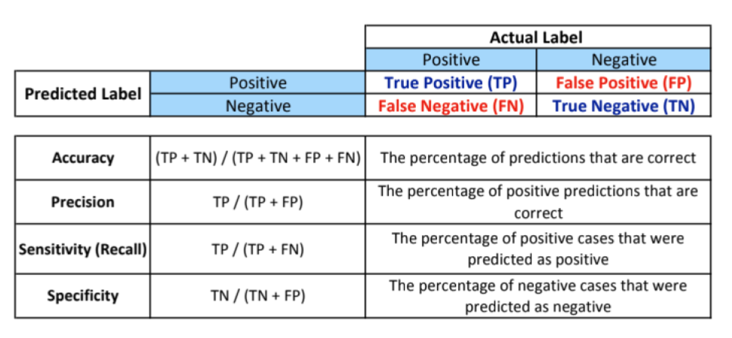

[[140  10]
 [ 54  27]]


Text(187.80000000000013, 0.5, 'Truth')

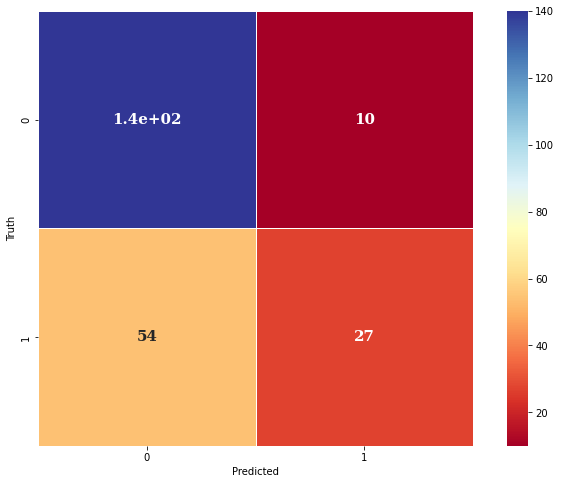

In [41]:
print(confusion_matrix(y_test,pred))
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,
            cmap='RdYlBu',linecolor='white',annot_kws={'fontsize':15,'fontweight':'bold','fontfamily':'serif'},
            linewidth=1,square=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

>  **show confusion matrix display how model work as it is compare between observed values and predicted values**



In [42]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=2
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred,target_names=['0 for Negative', '1 for Positive']))

WITH K=2


[[138  12]
 [ 60  21]]


                precision    recall  f1-score   support

0 for Negative       0.70      0.92      0.79       150
1 for Positive       0.64      0.26      0.37        81

      accuracy                           0.69       231
     macro avg       0.67      0.59      0.58       231
  weighted avg       0.68      0.69      0.64       231



In [43]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=35
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred,target_names=['0 for Negative', '1 for Positive']))

WITH K=35


[[140  10]
 [ 56  25]]


                precision    recall  f1-score   support

0 for Negative       0.71      0.93      0.81       150
1 for Positive       0.71      0.31      0.43        81

      accuracy                           0.71       231
     macro avg       0.71      0.62      0.62       231
  weighted avg       0.71      0.71      0.68       231



# Descion Tree :
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtree = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=5)

In [78]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

####  More Functions can be applied on our descion Tree:

In [79]:
dtree.get_params() # parameters for the estimator

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [80]:
#get the tree depth
dtree.get_depth()

3

In [81]:
# get the number of leaves in one side 
dtree.get_n_leaves()

8

In [82]:
#summarize feature importance (who is the most important ?)
importance=dtree.feature_importances_
for i ,v in enumerate (importance):
    print('Feature: %0d ,score:%.5f'%(i,v))

Feature: 0 ,score:0.00000
Feature: 1 ,score:0.66073
Feature: 2 ,score:0.02451
Feature: 3 ,score:0.00000
Feature: 4 ,score:0.00000
Feature: 5 ,score:0.19215
Feature: 6 ,score:0.12261
Feature: 7 ,score:0.00000


>**Glucose whose highest importance then BMI so, Glucose is the root.**

Text(0.5, 0, 'Glucose')

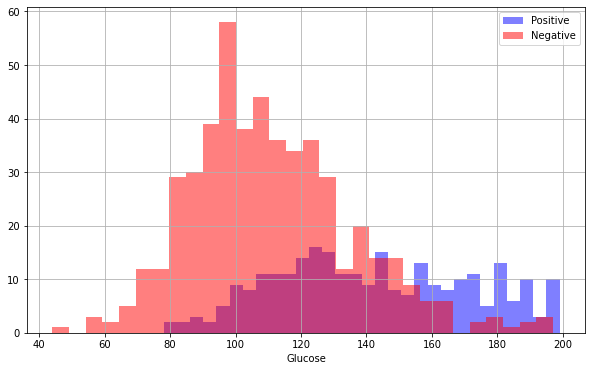

In [83]:
plt.figure(figsize=(10,6))
data[data['Outcome']==1]['Glucose'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Positive')
data[data['Outcome']==0]['Glucose'].hist(alpha=0.5,color='red',
                                              bins=30,label='Negative')
plt.legend()
plt.xlabel('Glucose')

>**as the glucose concentration increases in the blood the number of diabetes patients increases**

## Prediction and Evaluation 


In [84]:
predictions = dtree.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

In [86]:
accuracy_score(y_test,predictions)

0.6796536796536796

                precision    recall  f1-score   support

0 for Negative       0.72      0.93      0.81       150
1 for Positive       0.73      0.33      0.46        81

      accuracy                           0.72       231
     macro avg       0.73      0.63      0.64       231
  weighted avg       0.72      0.72      0.69       231





DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

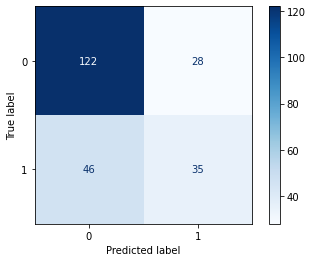

In [87]:
plot(dtree, X_test, y_test)

# Hyper parameter tuning:

# Gridsearch

Finding the right parameters (like what C or gamma values to use) ,just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch

In [88]:
# Setup the hyperparameter grid
tree_param = {
    'criterion':['gini', 'entropy', 'log_loss'], "max_depth" : [3,4,5,12,13, None],'splitter' : ['best', 'random']}

In [89]:
from sklearn.model_selection import GridSearchCV
def gridcv(param_grid,model,X_train,y_train):
    # Instantiate the GridSearchCV object: model_cv
    model_cv1 = GridSearchCV(model,param_grid,refit=True, cv=10, scoring = 'accuracy')
    # Fit it to the data
    model_cv1.fit(X_train,y_train)
    #Print the tuned parameters and score
    print("Tuned Parameters: {}".format(model_cv1.best_params_)) 
    print("Best score is {}".format(model_cv1.best_score_))
    print("Best estimator is {}".format(model_cv1.best_estimator_))

In [90]:
gridcv(tree_param,dtree,X_train,y_train)

Tuned Parameters: {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
Best score is 0.7558350803633822
Best estimator is DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=0,
                       splitter='random')


In [91]:
dtree_cv = DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=4,min_samples_leaf=5,splitter='random')

In [92]:
dtree_cv.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=1,
                       splitter='random')

In [105]:
predictions_ = dtree_cv.predict(X_test)

In [94]:
accuracy =accuracy_score(y_test,predictions_)
accuracy

0.683982683982684

## Tree Visualization


In [70]:
from sklearn.tree import plot_tree

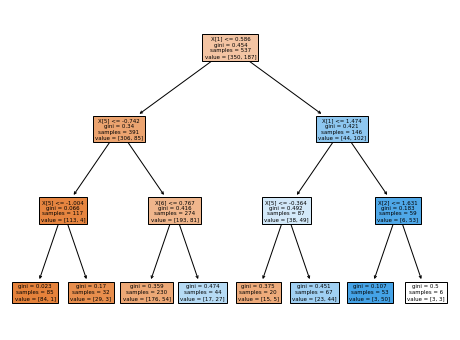

In [79]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize= (8, 6))
plot_tree(dtree, filled=True);

## glucose is the root node as it is the best score 

In [80]:
from sklearn.tree import export_text

r = export_text(dtree, feature_names=list(X.columns))
print(r)


|--- Glucose <= 0.59
|   |--- BMI <= -0.74
|   |   |--- BMI <= -1.00
|   |   |   |--- class: 0
|   |   |--- BMI >  -1.00
|   |   |   |--- class: 0
|   |--- BMI >  -0.74
|   |   |--- DiabetesPedigreeFunction <= 0.77
|   |   |   |--- class: 0
|   |   |--- DiabetesPedigreeFunction >  0.77
|   |   |   |--- class: 1
|--- Glucose >  0.59
|   |--- Glucose <= 1.47
|   |   |--- BMI <= -0.36
|   |   |   |--- class: 0
|   |   |--- BMI >  -0.36
|   |   |   |--- class: 1
|   |--- Glucose >  1.47
|   |   |--- BloodPressure <= 1.63
|   |   |   |--- class: 1
|   |   |--- BloodPressure >  1.63
|   |   |   |--- class: 0



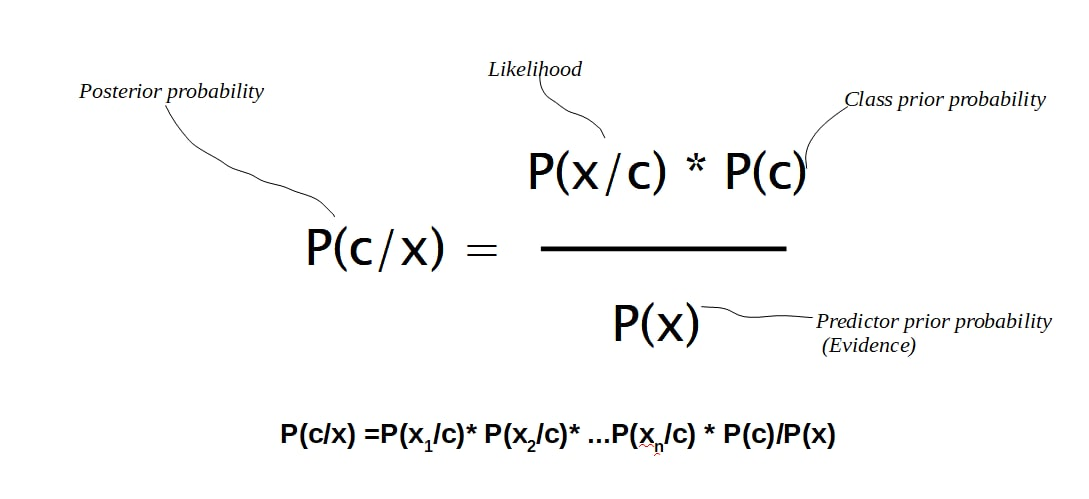

<a id='b'></a>
# Naive bayes 
> **Family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features**

## Using buit-in Functions:

In [101]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB,GaussianNB
model =BernoulliNB(alpha=0.1,binarize=1,fit_prior=True)

In [102]:
naive_param={'alpha':[0.1,1,1.1],'binarize':[0.1,0.2,1]}

In [103]:
gridcv(naive_param,model,X_train,y_train)

Tuned Parameters: {'alpha': 0.1, 'binarize': 1}
Best score is 0.735464709993012
Best estimator is BernoulliNB(alpha=0.1, binarize=1)


In [104]:
model.fit(X_train,y_train)

BernoulliNB(alpha=0.1, binarize=1)

In [105]:
model.get_params()

{'alpha': 0.1, 'binarize': 1, 'class_prior': None, 'fit_prior': True}

## Prediction and Evaluation


In [106]:
pred=model.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [107]:
model.score(X_test,y_test)

0.7272727272727273

In [108]:
model.predict_proba(X_test[:10])#probability of each class is diabetic or not

array([[0.88874821, 0.11125179],
       [0.88874821, 0.11125179],
       [0.74067072, 0.25932928],
       [0.11890823, 0.88109177],
       [0.88874821, 0.11125179],
       [0.88874821, 0.11125179],
       [0.88874821, 0.11125179],
       [0.28668034, 0.71331966],
       [0.10936869, 0.89063131],
       [0.56888671, 0.43111329]])

                precision    recall  f1-score   support

0 for Negative       0.73      0.91      0.81       150
1 for Positive       0.70      0.38      0.50        81

      accuracy                           0.73       231
     macro avg       0.72      0.65      0.65       231
  weighted avg       0.72      0.73      0.70       231





BernoulliNB(alpha=0.1, binarize=1)

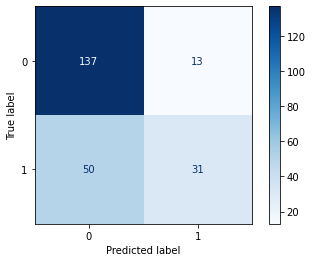

In [109]:
plot(model, X_test, y_test)

AUC: 0.6704938271604939


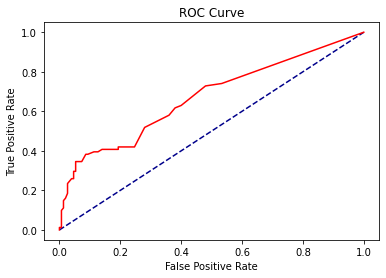

In [110]:
roc(model, X_test, y_test)

# Logistic Regression :
It is a Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.Logistic regression predicts the output of a categorical dependent variable It can be either Yes or No, 0 or 1. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

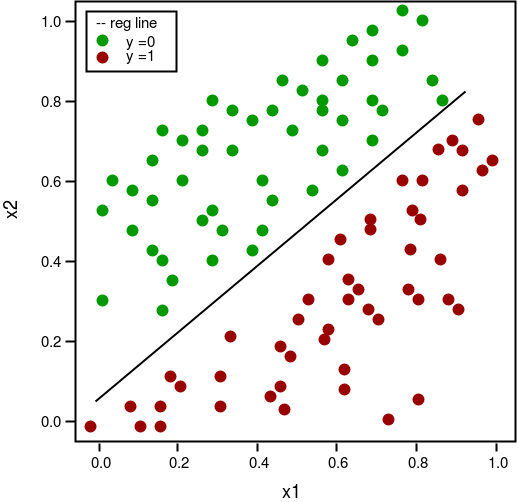

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
logmodel = LogisticRegression()

In [119]:
logmodel.fit(X_train,y_train)

LogisticRegression()

## Prediction and Evaluation

In [121]:
predictions = logmodel.predict(X_test)

In [122]:
accuracy_score(y_test,predictions)

0.7402597402597403

                precision    recall  f1-score   support

0 for Negative       0.72      0.93      0.81       150
1 for Positive       0.73      0.33      0.46        81

      accuracy                           0.72       231
     macro avg       0.73      0.63      0.64       231
  weighted avg       0.72      0.72      0.69       231





LogisticRegression()

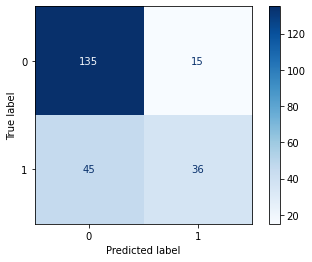

In [123]:
plot(logmodel,X_test,y_test)

AUC: 0.828559670781893


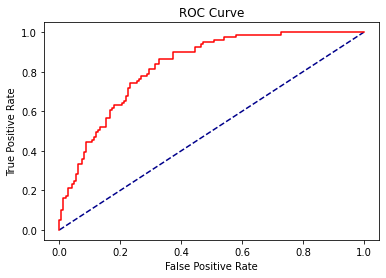

In [124]:
roc(logmodel, X_test, y_test)

# Support Vector Machine (SVM)
SVM  is a classifier that is formally designed by a separative hyperplane used for mapping categories by a gap as wide as possible.

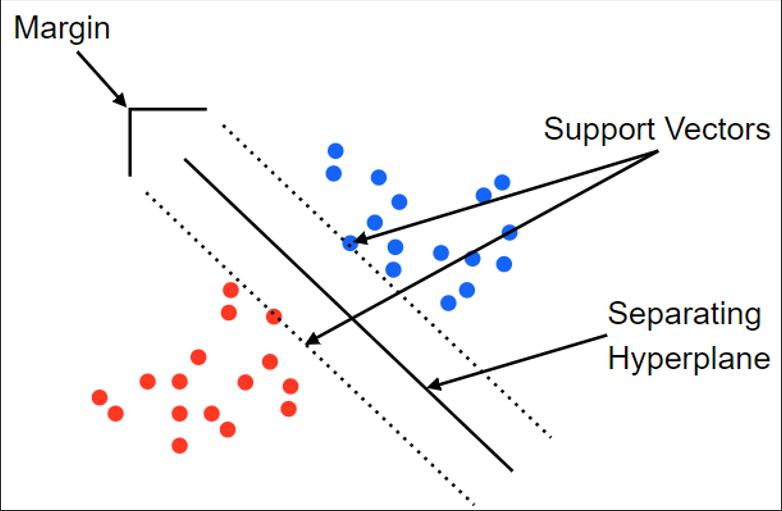

In [125]:
from sklearn.svm import SVC

In [126]:
models = SVC()

In [127]:
models.fit(X_train,y_train)

SVC()

## Predictions and Evaluations

In [128]:
predictionss = models.predict(X_test)

In [129]:
accuracy_score(y_test,predictionss)

0.7186147186147186

In [130]:
models.get_params() # parameters for the estimator

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

                precision    recall  f1-score   support

0 for Negative       0.72      0.93      0.81       150
1 for Positive       0.73      0.33      0.46        81

      accuracy                           0.72       231
     macro avg       0.73      0.63      0.64       231
  weighted avg       0.72      0.72      0.69       231





SVC()

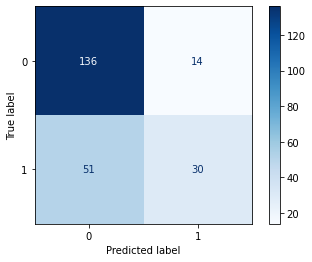

In [131]:
plot(models,X_test,y_test)

In [132]:
c_space = [0.1,1, 10, 100, 1000] #  preferd to be positive values
svm_pram = {'C': c_space, 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','rbf','sigmoid']}

In [133]:
gridcv(svm_pram,models,X_train,y_train)

Tuned Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best score is 0.7950384346610762
Best estimator is SVC(C=1, gamma=0.01)


In [140]:
svm_cv=SVC(C=1,gamma= 0.01,kernel= 'rbf',probability=True)

In [141]:
svm_cv.fit(X_train,y_train)

SVC(C=1, gamma=0.01, probability=True)

In [142]:
predictionss_ = svm_cv.predict(X_test)

In [143]:
accuracy_score(y_test,predictionss_ )

0.7272727272727273

                precision    recall  f1-score   support

0 for Negative       0.72      0.93      0.81       150
1 for Positive       0.73      0.33      0.46        81

      accuracy                           0.72       231
     macro avg       0.73      0.63      0.64       231
  weighted avg       0.72      0.72      0.69       231





SVC(C=1, gamma=0.01, probability=True)

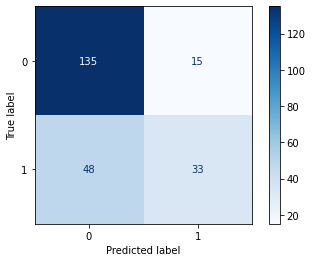

In [144]:
plot(svm_cv,X_test,y_test)

AUC: 0.8172427983539094


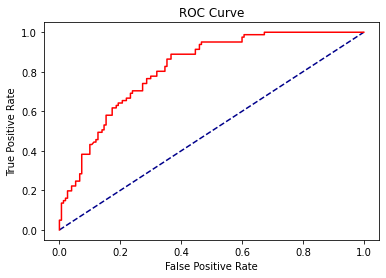

In [145]:
roc(svm_cv, X_test, y_test)

**Conclusion from supervised Learning** 
 - The accuracy with **KNN** : 74 %
 - The accuracy with **Descision Trees** : 68.5 %
 - The accuracy with **Naive Bayes** : 72.7%
 - The accuracy with **Logestic Regression**:75.3%
 - The accuracy with **Support vector Machine**:72.5%

<a id='un'></a>
# Unsupervised Learning 

# K Means 
>**unlabelled algorithm tries to cluster data based on their similarity in k groups**.

# Reading Dataset

In [79]:
df=pd.read_csv('Mall_Customers.csv')
df=pd.DataFrame(df)

# Explatory Data Analysis

In [80]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
df.shape

(200, 5)

In [82]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [85]:
#check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

>**There is no null values**

In [86]:
#check duplicates
df.duplicated().sum()

0

>**There is no duplicates**

###  conclusion : data is clean

# Data Visualization

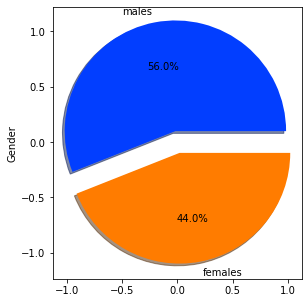

In [87]:
colors = sns.color_palette('bright')[0:5]
df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(5,5),colors=colors,
                                     frame=True,
                                     labels=['males','females']);

> **males are larger than females**

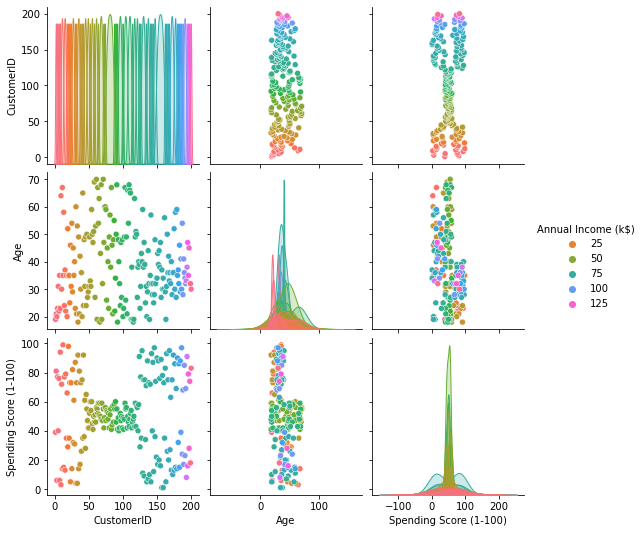

In [250]:
sns.pairplot(df, hue="Annual Income (k$)",palette='husl')


### remove irrelevent attributes 

In [88]:
df.drop('CustomerID', axis=1, inplace=True)

### Label Encoding - for encoding categorical features into numerical ones


In [89]:
from sklearn.preprocessing import LabelEncoder
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Choose the value of k:
> **we use the elbow method**

In [90]:
from sklearn.cluster import KMeans

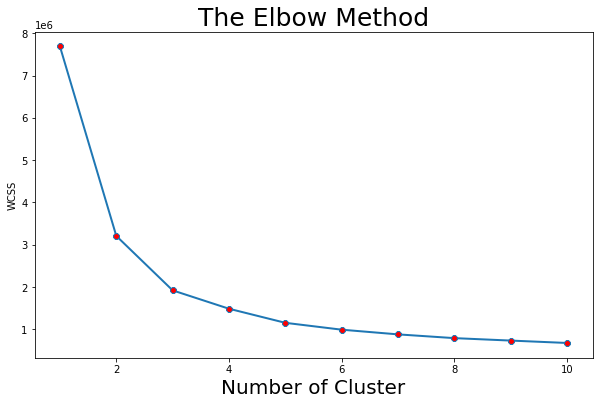

In [91]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='8', mfc='r',linewidth=2)
plt.title('The Elbow Method',fontsize = 25)
plt.xlabel('Number of Cluster',fontsize = 20)
plt.ylabel('WCSS')
plt.show()

>**in the above plot, we can see that the inertia (sum of squared distances to the nearest cluster center ) decreases as we increase in the number of clusters so , we would choose the k=5 as the best choice suitable for our data**

### Applying k-Means clustering:

In [92]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, random_state = 0)

In [93]:
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [94]:
#display clusters centroids 
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [95]:
# predict the label of input data 
y_pred=kmeans.predict(df)

In [96]:
# add clusters as a new feature un our data which will be the label 
df['clustered']=y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clustered
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


# Plotting Clusters made via Kmeans 

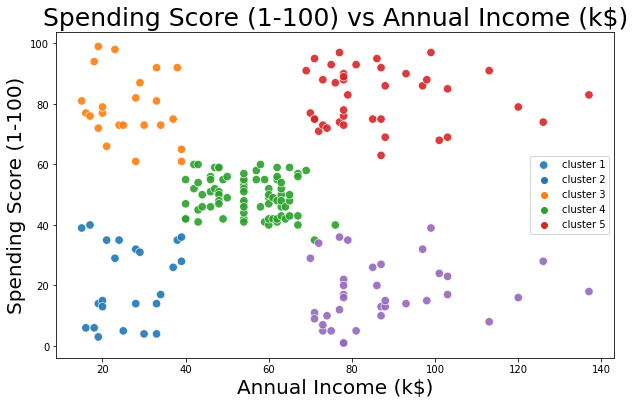

In [97]:
plt.figure(figsize=(10,6))
colors=np.array(['#68228B','#8B6969','#CD2626','#E3A869','#C6E2FF'])
sns.scatterplot(data=df, x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=colors[kmeans.labels_],Alpha=0.9,s=70)
plt.legend(['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5'])
plt.xlabel('Annual Income (k$)',fontsize = 20)
plt.ylabel('Spending Score (1-100)',fontsize = 20) 
plt.title('Spending Score (1-100) vs Annual Income (k$)',fontsize = 25)
plt.show()


In [98]:
from sklearn.metrics import classification_report
target_names = ['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5']
print(classification_report(df['clustered'],kmeans.labels_,target_names=target_names))

              precision    recall  f1-score   support

   cluster 1       1.00      1.00      1.00        23
   cluster 2       1.00      1.00      1.00        39
   cluster 3       1.00      1.00      1.00        79
   cluster 4       1.00      1.00      1.00        36
   cluster 5       1.00      1.00      1.00        23

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



> **its obvious an imaginary accuracy but its the general way to check for our prediction if we have already the set of labels**